In [28]:
# Importing necessary libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
oil_data = pd.read_csv(r'C:\Users\user\Desktop\Kifiya\Birhan_Energies\data\BrentOilPrices.csv') 

In [16]:
oil_data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [17]:
# Change the date to appropriate datetime frame
oil_data ['Date'] = pd.to_datetime (oil_data['Date'], dayfirst=True, errors='coerce')

In [18]:
# See the data
oil_data.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [19]:
# Data Summary and Data Info
print(oil_data.describe())
print(oil_data.info())

                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None


In [21]:
# Set Date as index
oil_data = oil_data.set_index('Date')

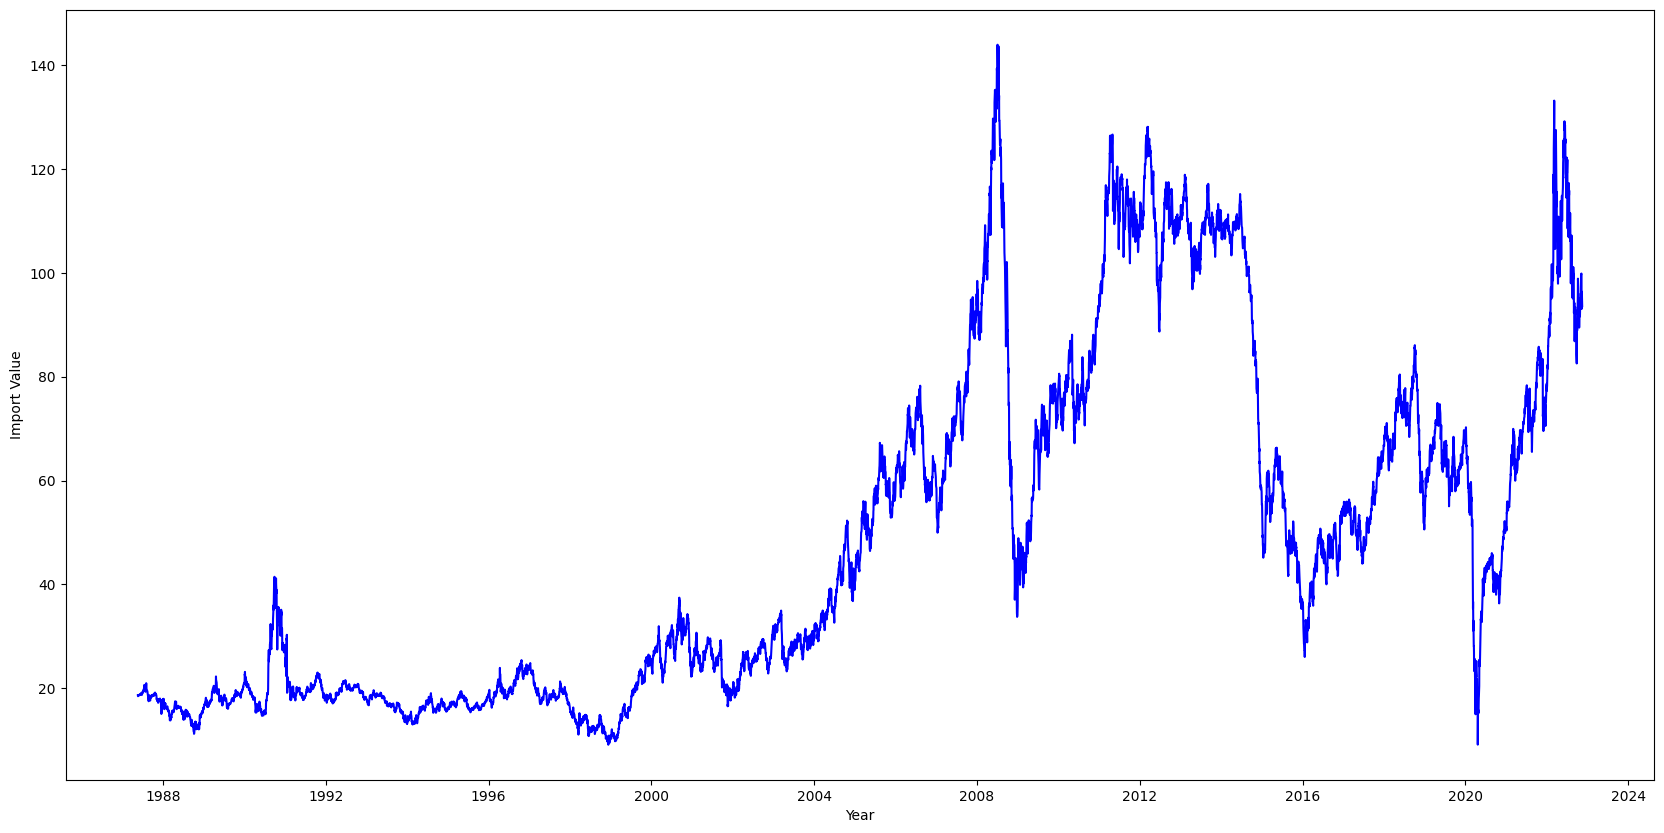

In [22]:
# Plot the trend of coffee imports over time

plt.figure(figsize=(20.5, 10))
plt.plot(oil_data.index, oil_data['Price'], color='blue')
plt.title('')
plt.xlabel('Year')
plt.ylabel('Import Value')
plt.grid(False)
plt.show()

In [25]:
oil_data['Price'].describe()

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

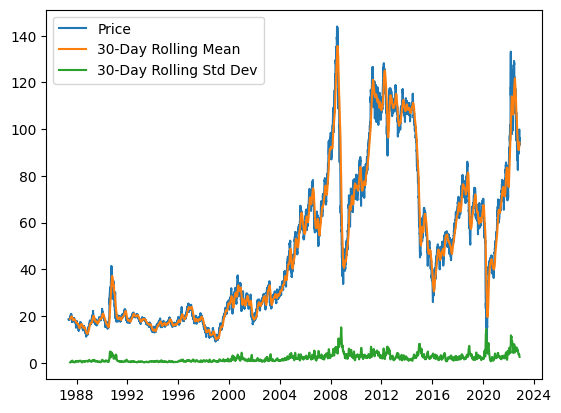

In [ ]:
# Rolling mean and standard deviation
rolling_mean = oil_data['Price'].rolling(window=30).mean()  # 30-day moving average
rolling_std = oil_data['Price'].rolling(window=30).std()

plt.plot(oil_data['Price'], label='Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean')
plt.plot(rolling_std, label='30-Day Rolling Std Dev')
plt.legend()
plt.show()

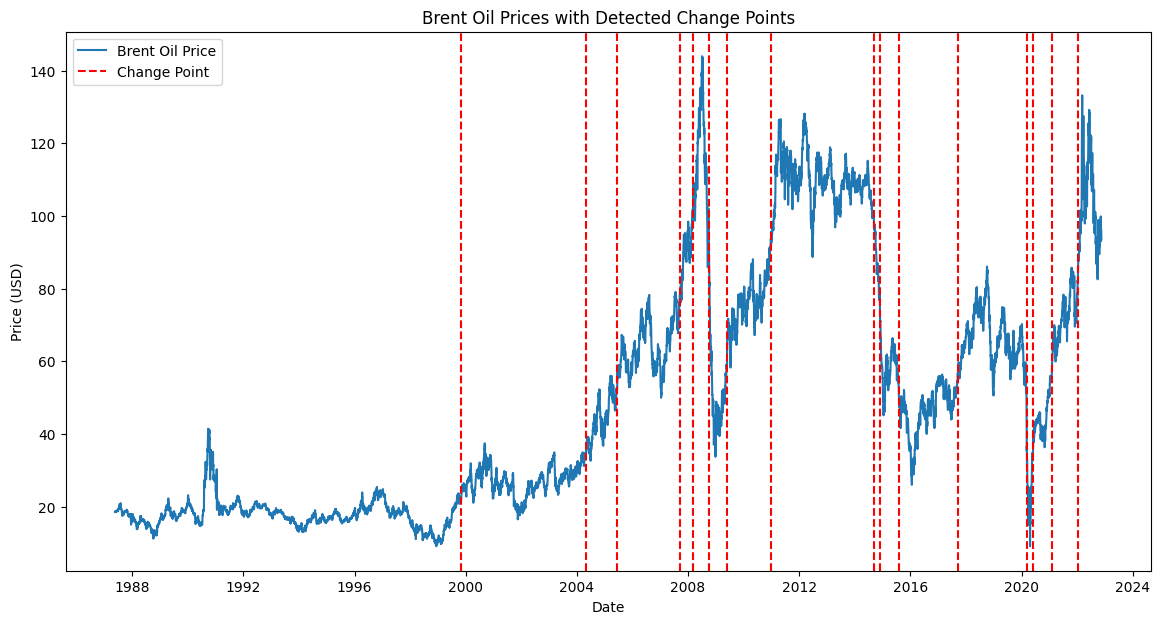

In [30]:
import ruptures as rpt
price_array = oil_data['Price'].values
model = "rbf"
algo = rpt.Pelt(model=model).fit(price_array)
change_points = algo.predict(pen=20)

plt.figure(figsize=(14, 7))
plt.plot(oil_data.index, oil_data['Price'], label='Brent Oil Price')
for cp in change_points[:-1]:
    plt.axvline(x=oil_data.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()

In [ ]:
price_array = oil_data['Price'].values
model = "rbf"
algo = rpt.Pelt(model=model).fit(price_array)
change_points = algo.predict(pen=20)

# Create a list to store change point information
change_point_info = []

# Iterate through change points and collect information
for cp in change_points[:-1]:
    change_date = oil_data.index[cp]
    change_price = oil_data['Price'].iloc[cp]
    change_point_info.append((change_date, change_price))

# Create a DataFrame from the collected information
change_points_df = pd.DataFrame(change_point_info, columns=['Change Date', 'Price'])

# Convert 'Change Date' to datetime if not already
change_points_df['Change Date'] = pd.to_datetime(change_points_df['Change Date'])

# Display the DataFrame
change_points_df

   Change Date   Price
0   1999-11-02   21.98
1   2004-05-04   36.07
2   2005-06-16   54.30
3   2007-09-12   77.15
4   2008-03-06  103.47
5   2008-10-08   80.77
6   2009-05-29   64.98
7   2010-12-21   93.11
8   2014-09-08   99.53
9   2014-12-02   71.13
10  2015-08-04   49.08
11  2017-09-19   56.58
12  2020-03-09   35.33
13  2020-05-29   34.15
14  2021-02-03   58.61
15  2022-01-14   87.17


In [37]:
# Save the DataFrame to a CSV file
change_points_df.to_csv(r'C:\Users\user\Desktop\Kifiya\Birhan_Energies\data\change_points.csv', index=False)
print("Change points saved to 'change_points.csv'")

Change points saved to 'change_points.csv'
